# Do multiphysics processes lead to mesh independent analyses?

In [1]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

pl.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

pl.rc('font', **font)

In [2]:
def root_finder(inp,k):
    if (np.abs(inp[0])<1e-12):
        p = [0,0,0]
        p[0]= inp[1]*k**2*(1+inp[3]*inp[7])+inp[0]*(inp[4]*k**2-1j*inp[8]*k-inp[9])
        p[1]= k**2*(inp[2]+inp[3]*inp[7]+inp[1]*(inp[4]*k**2+1j*inp[3]*inp[5]*k-1j*inp[8]*k+inp[3]*inp[6]-inp[9]))
        p[2]= k**2*(inp[2]*inp[4]*k**2-1j*k*(inp[2]*inp[8]-inp[3]*inp[5])+inp[3]*inp[6]-inp[2]*inp[9]) 
    else:
        p = [0,0,0,0,0]
        p[0]= inp[0]*inp[1]
        p[1]= inp[0]-inp[0]*inp[1]*inp[9]-1j*inp[8]*inp[1]*inp[0]*k+inp[0]*inp[1]*inp[4]*k**2
        p[2]= inp[1]*k**2*(1+inp[3]*inp[7])+inp[0]*(inp[4]*k**2-1j*inp[8]*k-inp[9])
        p[3]= k**2*(inp[2]+inp[3]*inp[7]+inp[1]*(inp[4]*k**2+1j*inp[3]*inp[5]*k-1j*inp[8]*k+inp[3]*inp[6]-inp[9]))
        p[4]= k**2*(inp[2]*inp[4]*k**2-1j*k*(inp[2]*inp[8]-inp[3]*inp[5])+inp[3]*inp[6]-inp[2]*inp[9])
    sols = np.roots(p)
    a1 = np.amax(np.real(sols))
    a3 = np.argmax(np.real(sols))
    a2 = np.imag(sols[a3])
    return a1,a2,a3

In [3]:
def fun_eval(rules,k):
    nk = len(k)
    y   = np.zeros(nk)
    z   = np.zeros(nk)
    ind = np.zeros(nk)
    for i in range(nk):
        y[i],z[i],ind[i] = root_finder(rules,k[i])
    return y,z,ind    

## Insert your values here

Text(0, 0.5, '$Im(s)$')

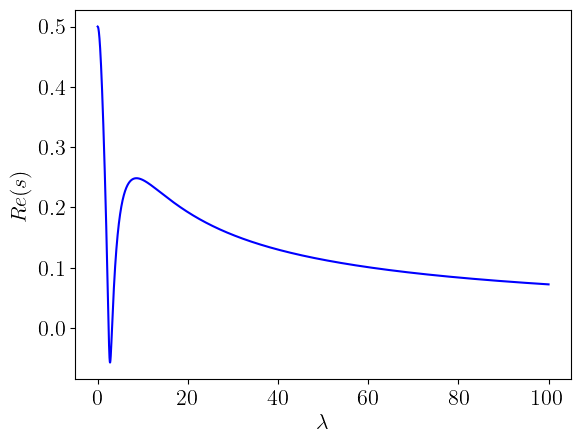

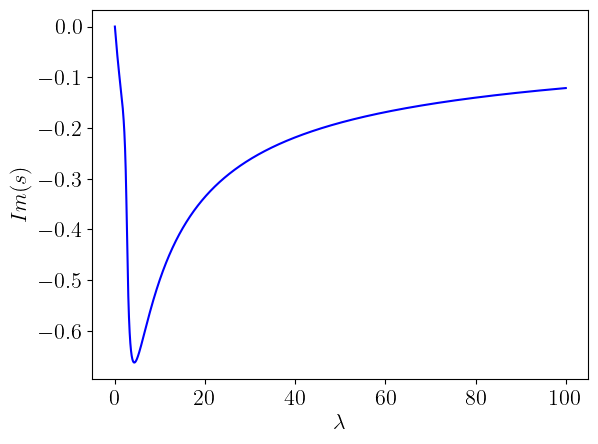

In [32]:
x = np.linspace(1e-7, 100., 4000)
k = np.reciprocal(x)*np.pi*2.


Rho =  1.0
Eta =  0.2
h   = -0.1
a   =  0.25
Df  =  1.
U   =  0.5
V   =  3.0
W   = -1.
A   =  0.0
B   =  0.0

rules = [Rho,Eta,h,a,Df,U,V,W,A,B]

y,z,ind = fun_eval(rules,k)
pl.figure(1)
pl.plot(x, y, color='b')
pl.figure(2)
pl.plot(x, z, color='b')
    
pl.figure(1)
#pl.colorbar(sm, label=r"$\bar{\alpha}U$")
pl.xlabel(r'$\lambda$')
pl.ylabel(r'$Re(s)$')
#pl.ylim(ymax = 0.1, ymin = -0.02)
#pl.savefig('figs/aU_Re_01rho01.pdf')  

pl.figure(2)
#pl.colorbar(sm, label=r"$\bar{\alpha}U$")
pl.xlabel(r'$\lambda$')
pl.ylabel(r'$Im(s)$')
#pl.ylim(ymax = 1.2, ymin = -1.2)
#pl.savefig('figs/aU_Im_01rho01.pdf')  